In [45]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import seaborn as sns


In [70]:
file_path = '.\dataset\jazz\out.jazz'
data = np.loadtxt(file_path, delimiter='\t', dtype=int)
data

array([[ 9,  4],
       [10,  6],
       [10,  7],
       [11,  1],
       [11,  3],
       [14,  6],
       [14,  7],
       [14, 10],
       [15,  1],
       [15,  4],
       [16,  1],
       [17, 15],
       [18,  2],
       [18,  7],
       [18, 10],
       [18, 14],
       [19, 16],
       [20,  2],
       [20,  8],
       [21,  9],
       [21, 17],
       [21, 19],
       [22, 19],
       [23, 18],
       [25, 15],
       [25, 16],
       [25, 19],
       [26, 18],
       [27,  2],
       [27, 26],
       [28,  2],
       [28,  8],
       [28, 18],
       [28, 26],
       [28, 27],
       [29,  2],
       [29,  9],
       [29, 21],
       [30, 11],
       [30, 19],
       [30, 22],
       [30, 25],
       [31,  8],
       [31, 20],
       [31, 29],
       [32, 18],
       [33, 10],
       [33, 14],
       [34, 13],
       [34, 15],
       [34, 17],
       [34, 22],
       [35, 15],
       [35, 34],
       [36, 30],
       [37,  2],
       [37, 21],
       [37, 24],
       [38,  9

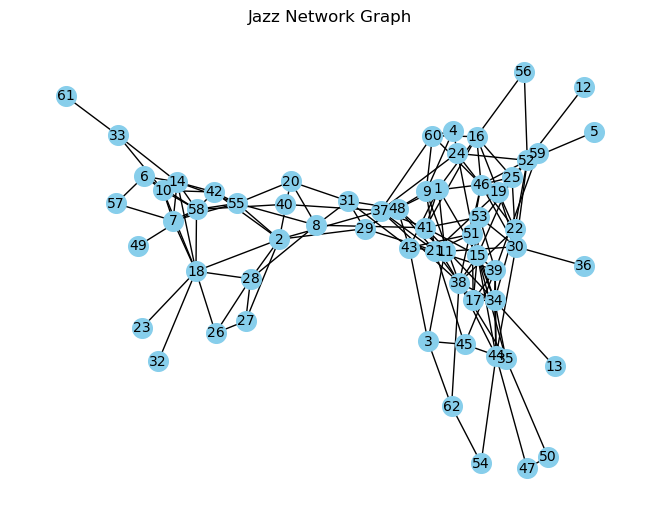

In [71]:
#Show Graph relations
G = nx.Graph()
for x, y in data:
    G.add_edge(x, y)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10)
plt.title('Jazz Network Graph')
plt.show()   

In [72]:
def run_nmf(data, n_components):
    model = NMF(n_components=n_components, init='random', random_state=0)
    w = model.fit_transform(data)
    h = model.components_
    return model,w,h

In [73]:
#component count
n_components = 2

#NMF
model,W,H = run_nmf(data, n_components)



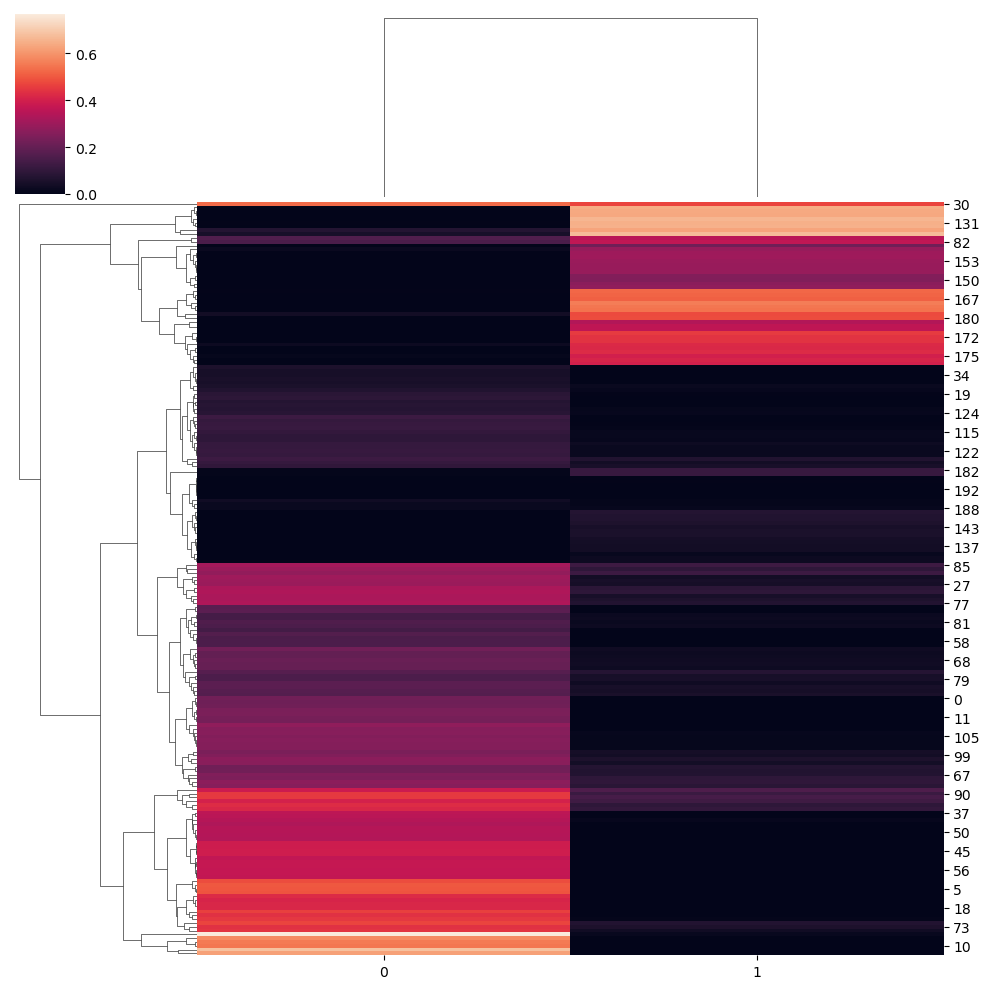

In [62]:
sns.clustermap(W)


In [67]:
cluster_membership = np.argmax(W.T, axis=0)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2742 but corresponding boolean dimension is 198

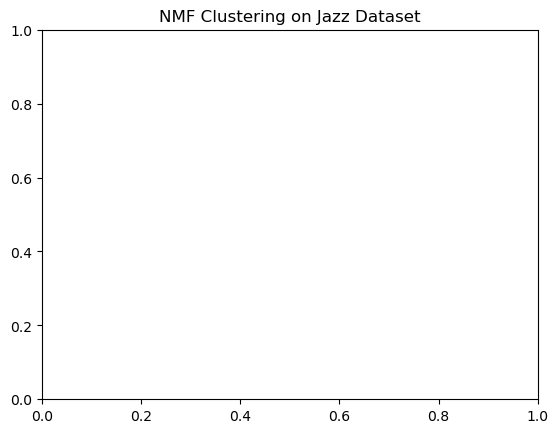

In [69]:
fig, ax = plt.subplots()


plt.title('NMF Clustering on Jazz Dataset')

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

for j in range(n_components):
    ax.scatter(data[cluster_membership == j, 0], data[cluster_membership == j, 1],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()